<a href="https://colab.research.google.com/github/ANKS04UB/data-science/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv("/content/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [4]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [5]:
# replacing na with nan
dataset=dataset.replace("na",np.nan)

In [6]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [7]:
dataset.isnull().sum().sum()

71649

In [8]:
# count nan value
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)).rename(columns={0:'Null_value_count'})

,Null_value_count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [9]:
# filling zero with median
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
  dataset[feature]=dataset[feature].fillna(dataset[feature].median())

In [10]:
dataset.isnull().sum().sum()

0

In [11]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [12]:
# segrading data
X=dataset.drop('class',axis=1)

In [13]:
y=dataset['class']

In [14]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [15]:
y=pd.get_dummies(y,drop_first=True)

In [16]:
# data spliting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [18]:
# scaler the data transforming into small scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [20]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=170))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.25)

Epoch 1/20
300/300 [==============================] - 3s 3ms/step - loss: 0.6612 - accuracy: 0.7933 - val_loss: 0.3781 - val_accuracy: 0.9800
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1486 - accuracy: 0.9820 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9880 - val_loss: 0.0561 - val_accuracy: 0.9870
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0532 - val_accuracy: 0.9870
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0593 - val_accuracy: 0.9890
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0583 - val_accuracy: 0.9890
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0663 - val_accuracy: 0.9870
Epoch 

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

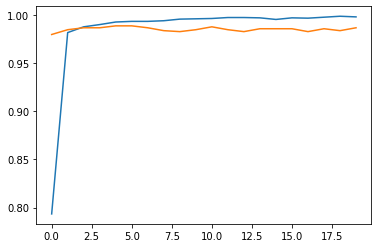

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


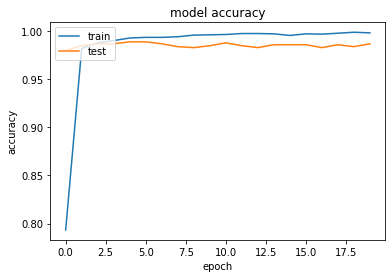

In [26]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred=classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [28]:
y_pred=y>0.05

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00


In [32]:
from kerastuner.tuners import RandomSearch


In [50]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [51]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')


In [52]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))


Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9890000224113464
Total elapsed time: 00h 00m 28s


In [53]:
tuner_second.get_best_hyperparameters()[0].values


{'num_layers': 11,
 'units_0': 128,
 'units_1': 96,
 'learning_rate': 0.001,
 'units_2': 128,
 'units_3': 64,
 'units_4': 448,
 'units_5': 224,
 'units_6': 160,
 'units_7': 224,
 'units_8': 320,
 'units_9': 192,
 'units_10': 160,
 'units_11': 320,
 'units_12': 320,
 'units_13': 160,
 'units_14': 288,
 'units_15': 96,
 'units_16': 32,
 'units_17': 288,
 'units_18': 480,
 'units_19': 64}

In [54]:
classifier2=tuner_second.get_best_models(num_models=1)[0]
